In [1]:
!pip3 install layoutparser torchvision && pip3 install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
!pip3 install "layoutparser[ocr]"

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /private/var/folders/k0/5lfd2z4n64qdlnzn62hkwr540000gn/T/pip-install-9r65fbto/detectron2_cfd7445effe6415ea35884da7fc64d5e
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /private/var/folders/k0/5lfd2z4n64qdlnzn62hkwr540000gn/T/pip-install-9r65fbto/detectron2_cfd7445effe6415ea35884da7fc64d5e
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done


In [2]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tesseract-ocr

  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for cython from https://files.pythonhosted.org/packages/e3/7f/f584f5d15323feb897d42ef0e9d910649e2150d7a30cf7e7a8cc1d236e6f/Cython-3.0.8-py2.py3-none-any.whl.metadata
  Using cached Cython-3.0.8-py2.py3-none-any.whl.metadata (3.2 kB)
Using cached Cython-3.0.8-py2.py3-none-any.whl (1.2 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [30 lines of output]
      /Users/nishithranjanbiswas/anaconda3/lib/python3.11/site-packages/setuptools/dist.py:745: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
  

In [4]:
import imageio

img = imageio.imread('docs/skerry-ryan18a - pag 4.jpg')
print(img.shape)

(2816, 2176, 3)


/var/folders/k0/5lfd2z4n64qdlnzn62hkwr540000gn/T/ipykernel_23993/3062930378.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('docs/skerry-ryan18a - pag 4.jpg')


In [5]:
import layoutparser as lp

model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

/Users/nishithranjanbiswas/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
config.yaml?dl=1: 8.19kB [00:01, 6.64kB/s]
model_final.pth?dl=1: 856MB [01:36, 8.89MB/s]                                   
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [6]:
layout_result = model.detect(img)
layout_result

/Users/nishithranjanbiswas/anaconda3/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Layout(_blocks=[TextBlock(block=Rectangle(x_1=191.84645080566406, y_1=938.1566162109375, x_2=1031.699462890625, y_2=1091.0120849609375), text=None, id=None, type=Text, parent=None, next=None, score=0.9937334656715393), TextBlock(block=Rectangle(x_1=1087.5972900390625, y_1=1585.870849609375, x_2=1932.7237548828125, y_2=2131.641845703125), text=None, id=None, type=Text, parent=None, next=None, score=0.9929723739624023), TextBlock(block=Rectangle(x_1=1092.64794921875, y_1=1505.50341796875, x_2=1746.64794921875, y_2=1549.14306640625), text=None, id=None, type=Title, parent=None, next=None, score=0.9874151349067688), TextBlock(block=Rectangle(x_1=195.5931854248047, y_1=1340.6240234375, x_2=1037.143798828125, y_2=1592.40673828125), text=None, id=None, type=Text, parent=None, next=None, score=0.9863011837005615), TextBlock(block=Rectangle(x_1=190.9193878173828, y_1=1938.5394287109375, x_2=1032.5833740234375, y_2=2407.25537109375), text=None, id=None, type=Text, parent=None, next=None, score=0

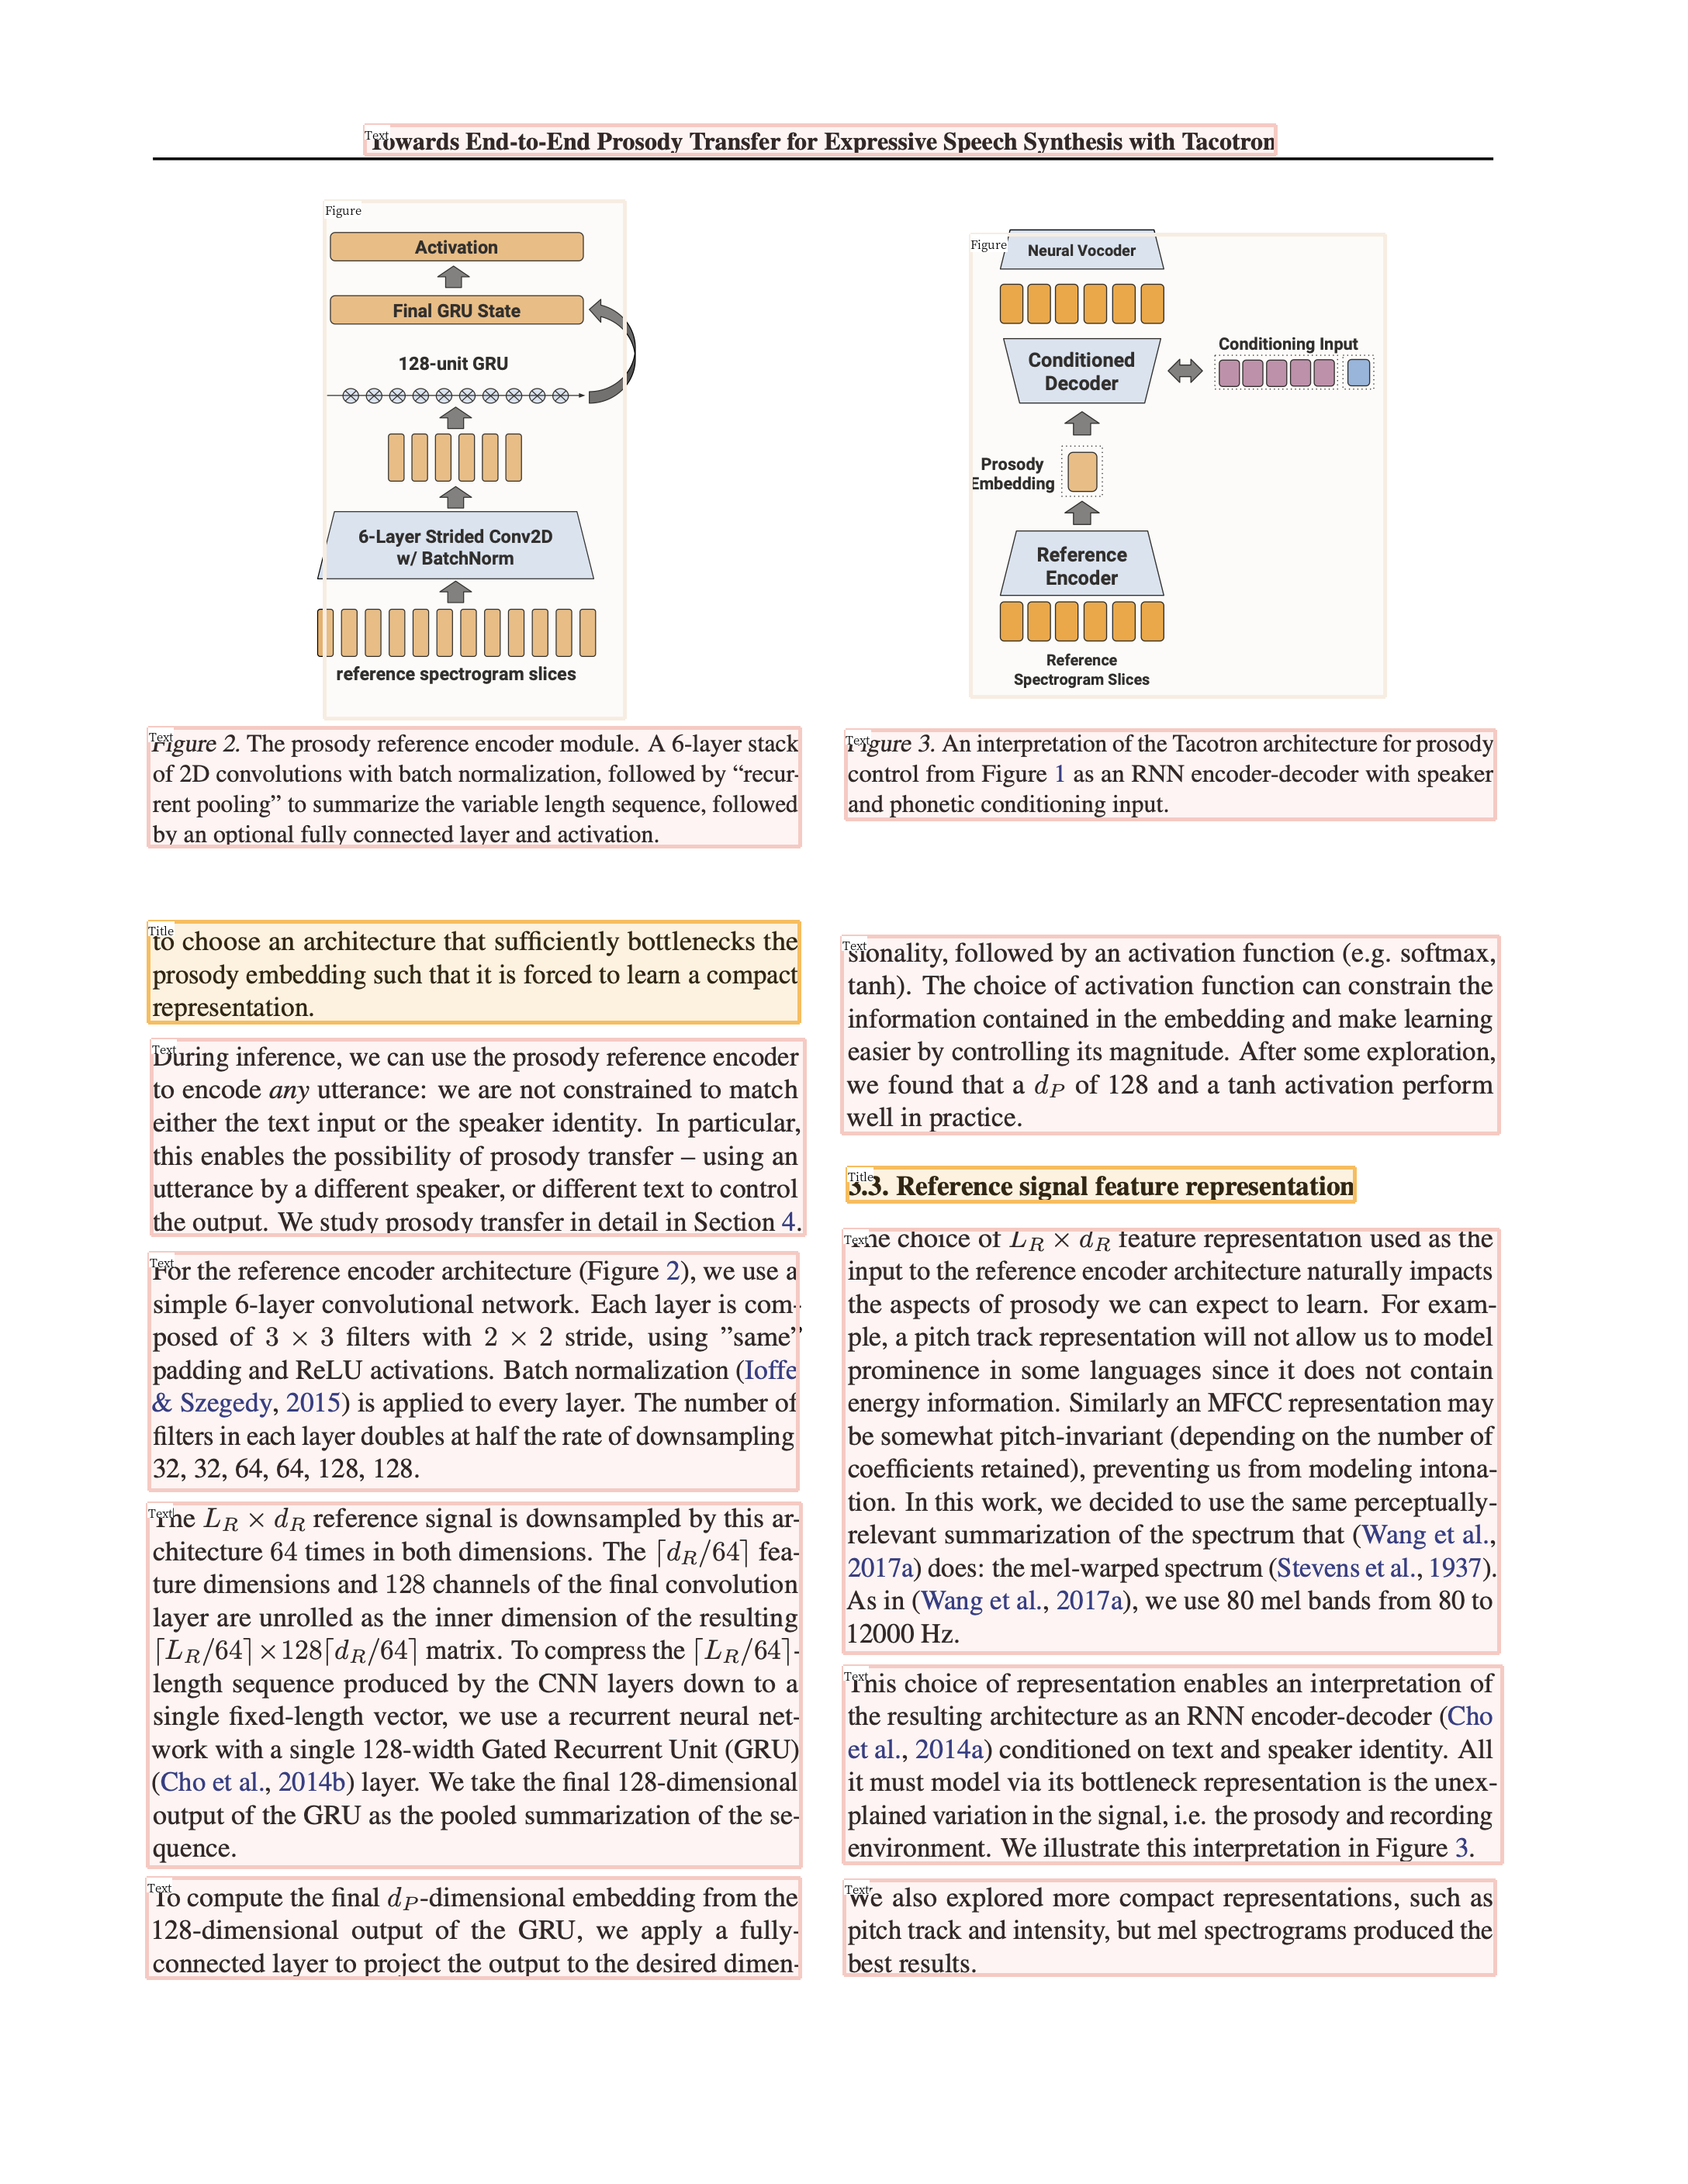

In [7]:
lp.draw_box(img, layout_result,  box_width=5, box_alpha=0.2, show_element_type=True)

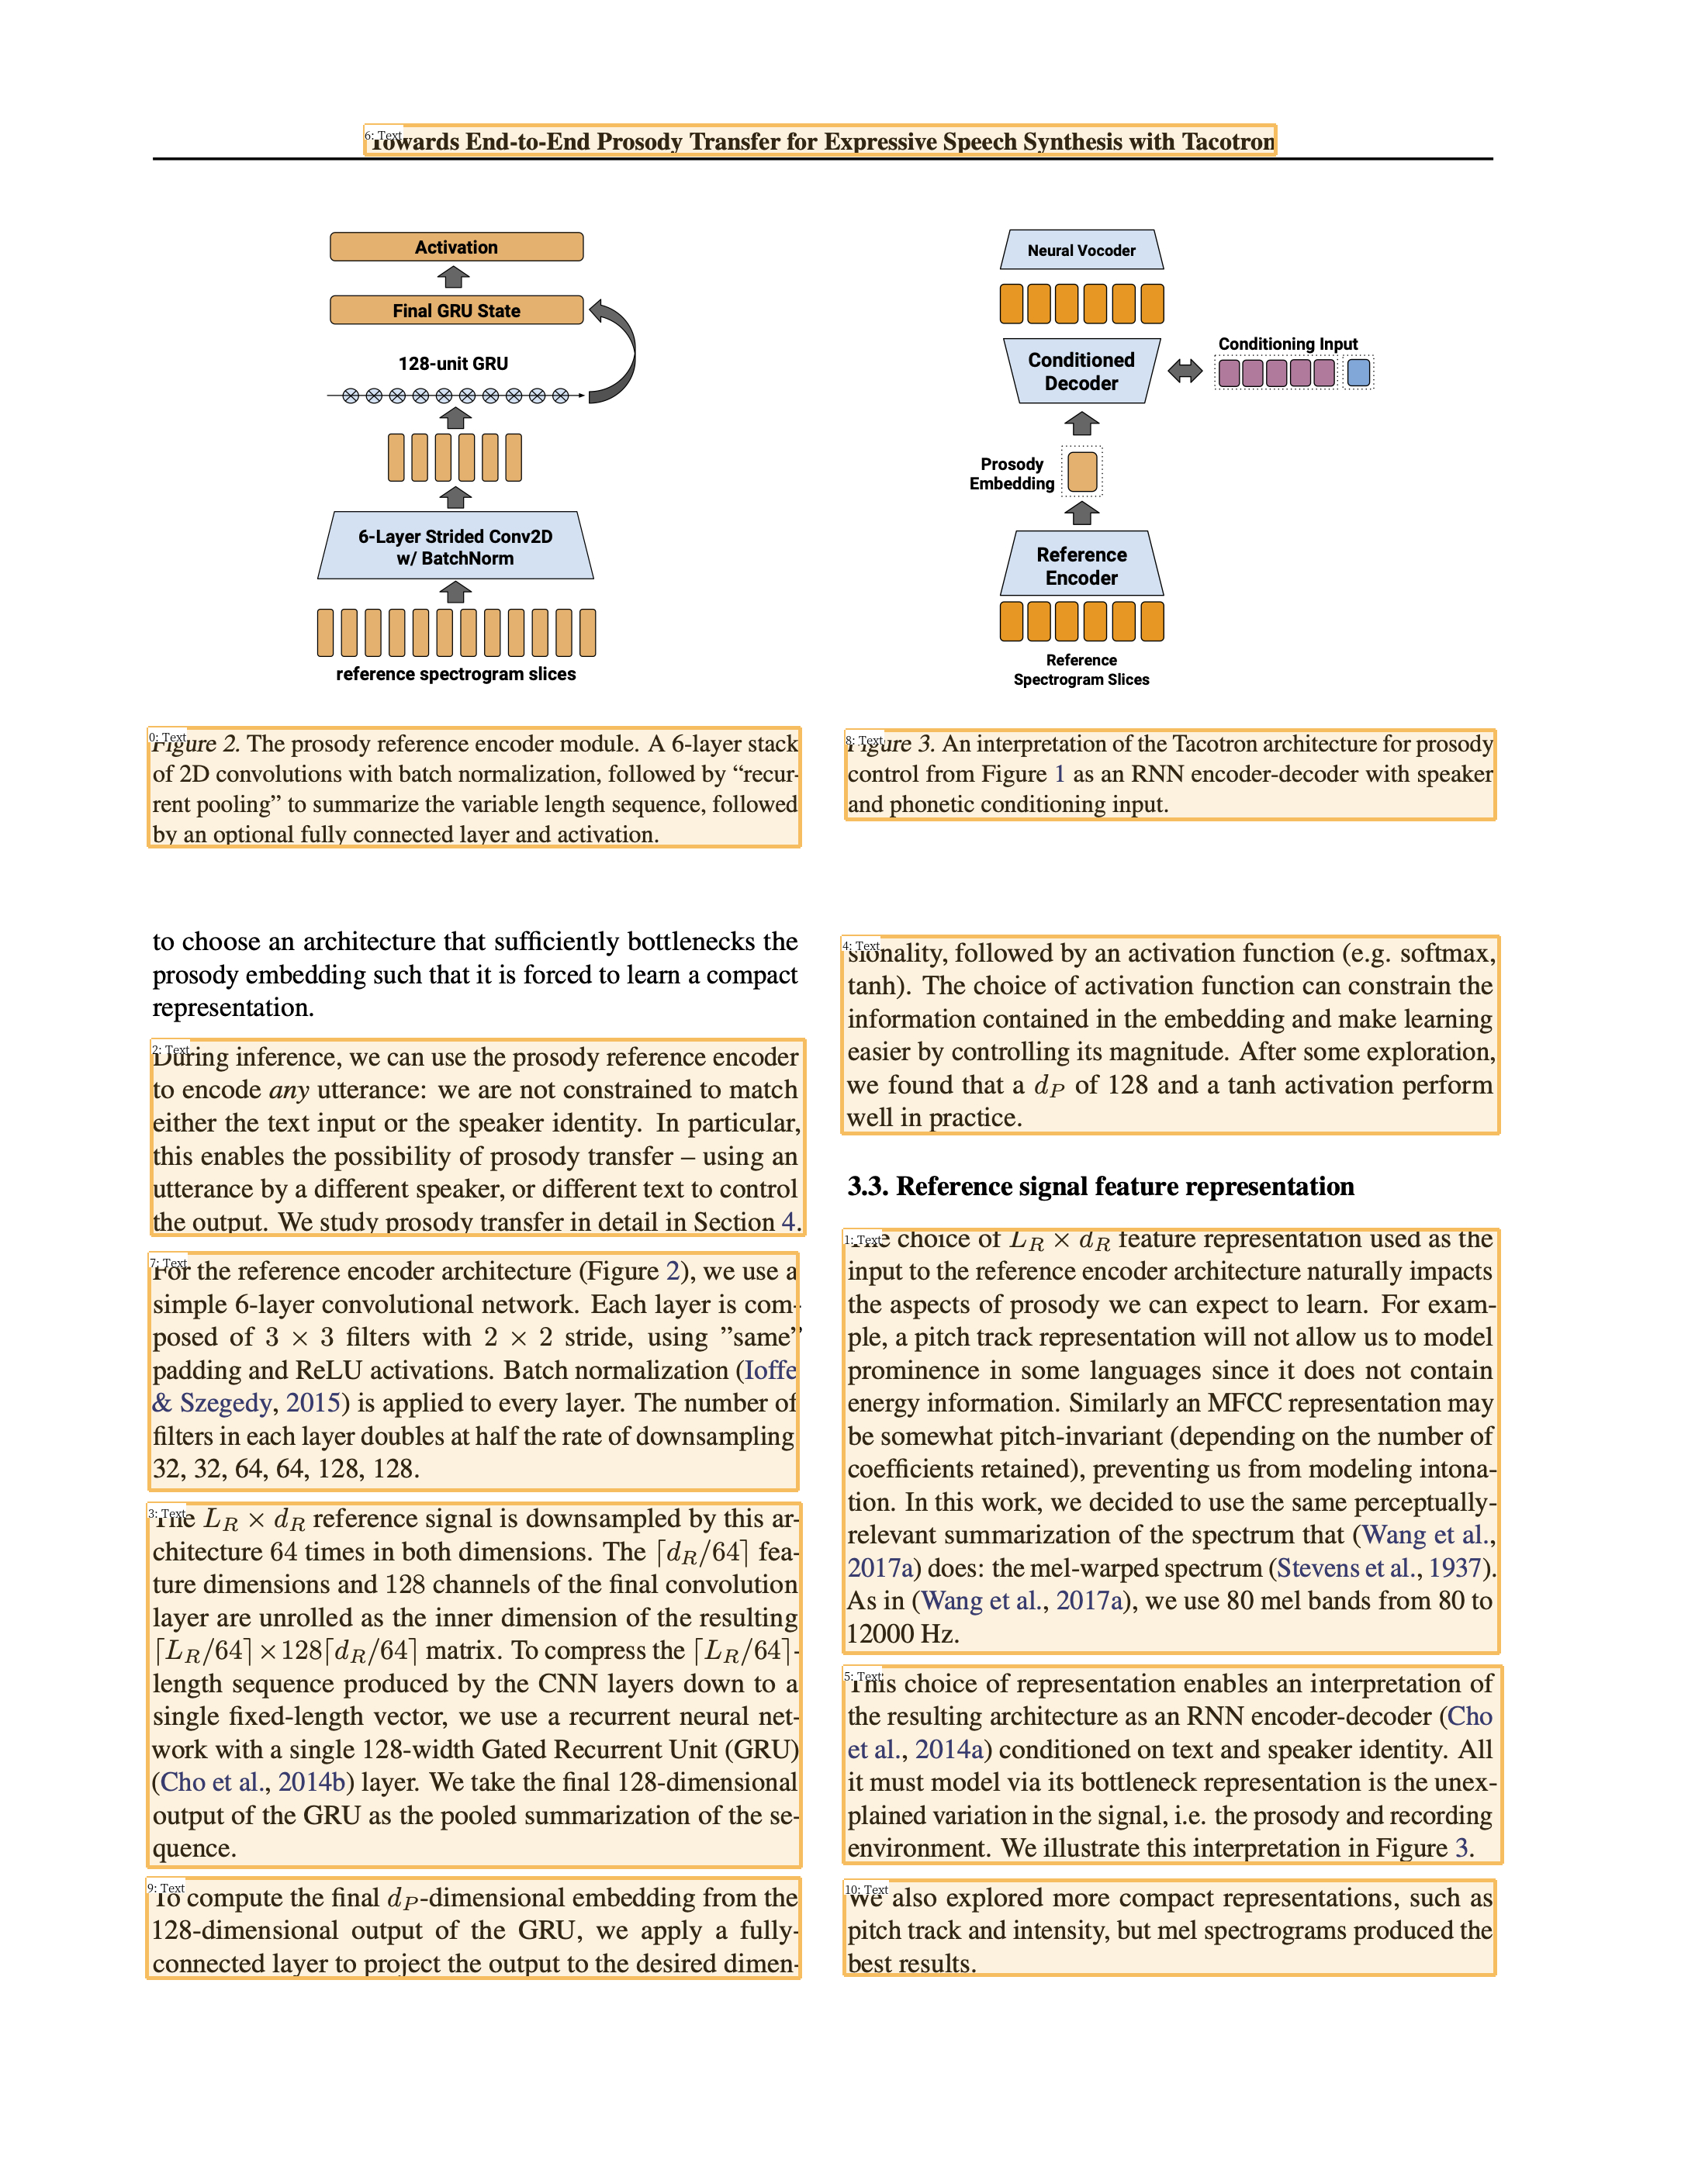

In [8]:
text_blocks = lp.Layout([b for b in layout_result if b.type=='Text'])
lp.draw_box(img, text_blocks,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

In [9]:
image_width = len(img[0])

# Sort element ID of the left column based on y1 coordinate
left_interval = lp.Interval(0, image_width/2, axis='x').put_on_canvas(img)
left_blocks = text_blocks.filter_by(left_interval, center=True)._blocks
left_blocks.sort(key = lambda b:b.coordinates[1])

# Sort element ID of the right column based on y1 coordinate
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# Sort the overall element ID starts from left column
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

In [10]:
ocr_agent = lp.TesseractAgent(languages='eng')

In [13]:
for block in text_blocks:

    # Crop image around the detected layout
    segment_image = (block.pad(left=15, right=15, top=5, bottom=5).crop_image(img))
    
    # Perform OCR
    text = ocr_agent.detect(segment_image)

    # Save OCR result
    block.set(text=text, inplace=True)

In [12]:
conda install -c auto pytesseract 

Retrieving notices: ...working... done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-arm64::scikit-image==0.20.0=py311h313beb8_0
  - defaults/osx-arm64::pyerfa==2.0.0=py311h80987f9_0
  - defaults/osx-arm64::pywavelets==1.4.1=py311h80987f9_0
  - defaults/osx-arm64::bokeh==3.2.1=py311hb6e6a13_0
  - defaults/osx-arm64::_anaconda_depends==2023.09=py311_openblas_1
  - defaults/osx-arm64::pyarrow==11.0.0=py311h7575258_1
  - defaults/osx-arm64::patsy==0.5.3=py311hca03da5_0
  - defaults/osx-arm64::anaconda-catalogs==0.2.0=py311hca03da5_0
  - defaults/osx-arm64::datashape==0.5.4=py311hca03da5_1
  - defaults/osx-arm64::numexpr==2.8.4=py311h6dc990b_1
  - defaults/osx-arm64::dask==2023.6.0=py311hca03da5_0
  - defaults/osx-arm64::datasets==2.12.0=py311hca03da5_0
  - defaults/osx-arm64::numba==0.57.1=py311h7aedaa7_0
  - defaults/osx-arm64::numpy==1.24.3=py311hb57d4eb_0
  - defau

plotly-5.19.0        | 6.3 MB    | ########################3             |  66% 

scikit-learn-1.3.0   | 8.8 MB    | ########                              |  22% 




leptonica-1.82.0     | 2.1 MB    | ##################1                   |  49% 
plotly-5.19.0        | 6.3 MB    | ##########################1           |  71% 

scikit-learn-1.3.0   | 8.8 MB    | #########                             |  25% 




leptonica-1.82.0     | 2.1 MB    | #####################4                |  58% 
pandas-2.1.4         | 14.3 MB   | ####################1                 |  54% 


tesseract-5.2.0      | 167.9 MB  | 5                                     |   2% 




plotly-5.19.0        | 6.3 MB    | ###########################9          |  75% 
pandas-2.1.4         | 14.3 MB   | #####################2                |  57% 

scikit-learn-1.3.0   | 8.8 MB    | ##########                            |  27% 


tesseract-5.2.0      | 167.9 MB  | 6                                     |   2% 




lepto

plotly-5.19.0        | 6.3 MB    | ##################################### | 100% 


tesseract-5.2.0      | 167.9 MB  | ##########2                           |  28% 


tesseract-5.2.0      | 167.9 MB  | ##########5                           |  28% 


tesseract-5.2.0      | 167.9 MB  | ##########7                           |  29% 


tesseract-5.2.0      | 167.9 MB  | ###########                           |  30% 


tesseract-5.2.0      | 167.9 MB  | ###########3                          |  31% 


tesseract-5.2.0      | 167.9 MB  | ###########5                          |  31% 


tesseract-5.2.0      | 167.9 MB  | ###########8                          |  32% 


tesseract-5.2.0      | 167.9 MB  | ############1                         |  33% 


tesseract-5.2.0      | 167.9 MB  | ############3                         |  33% 


tesseract-5.2.0      | 167.9 MB  | ############6                         |  34% 


tesseract-5.2.0      | 167.9 MB  | ############8                         |  35% 


tess

tesseract-5.2.0      | 167.9 MB  | #################################1    |  90% 


tesseract-5.2.0      | 167.9 MB  | #################################4    |  90% 


tesseract-5.2.0      | 167.9 MB  | #################################7    |  91% 


tesseract-5.2.0      | 167.9 MB  | #################################9    |  92% 


tesseract-5.2.0      | 167.9 MB  | ##################################2   |  92% 


tesseract-5.2.0      | 167.9 MB  | ##################################5   |  93% 


tesseract-5.2.0      | 167.9 MB  | ##################################7   |  94% 


tesseract-5.2.0      | 167.9 MB  | ###################################   |  95% 


tesseract-5.2.0      | 167.9 MB  | ###################################3  |  95% 


tesseract-5.2.0      | 167.9 MB  | ###################################5  |  96% 


tesseract-5.2.0      | 167.9 MB  | ###################################8  |  97% 


tesseract-5.2.0      | 167.9 MB  | ####################################  |  98% 


tess

In [14]:
for txt in text_blocks:
    print(txt.text, end='\n\n')

Towards End-to-End Prosody Transfer for Expressive Speech Synthesis with Tacotron



Figure 2. The prosody reference encoder module. A 6-layer stack
of 2D convolutions with batch normalization, followed by “recur-
rent pooling” to summarize the variable length sequence, followed
by an optional fully connected layer and activation.


During inference, we can use the prosody reference encoder
to encode any utterance: we are not constrained to match
either the text input or the speaker identity. In particular,
this enables the possibility of prosody transfer — using an
utterance by a different speaker, or different text to control
the output. We study prosody transfer in detail in Section 4.


For the reference encoder architecture (Figure 2), we use a
simple 6-layer convolutional network. Each layer is com-
posed of 3 x 3 filters with 2 x 2 stride, using ’same”
padding and ReLU activations. Batch normalization (Ioffe
& Szegedy, 2015) is applied to every layer. The number of
filters in ea